In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. We can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [224]:
file1="dete_survey.csv"
file2="tafe_survey.csv"
dete=pd.read_csv(file1,na_values=["Not Stated"]) #replace the data with NAN values while reading 
tafe=pd.read_csv(file2,na_values=["Not Stated"])

**when we include stat math and hypothese in our work then it make us DS 
while data analysic check the historical data while DS predict the data for future**

* stake holder which have the interest (crediters, supplyers, customers, also sharehoder include)

* shareholder which have buy the shares

In [225]:
dete.head(2)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [226]:
tafe.head(2)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
 dete.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [228]:
tafe.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [229]:
len( dete.columns)

56

In [230]:
len( tafe.columns)

72

In [231]:
dete.shape

(822, 56)

In [232]:
822*56 # data points

46032

In [233]:
tafe.shape

(702, 72)

In [234]:
702*72

50544

# **idtentify the important colum**

In [235]:
dete.columns[28:49]

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [236]:
tafe.columns[17:66] # means 17 to 65

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

In [237]:
update_dete=dete.drop(dete.columns[28:49],axis=1)
update_tafe=tafe.drop(tafe.columns[17:66],axis=1)

In [238]:
update_dete.shape

(822, 35)

In [239]:
update_tafe.shape

(702, 23)

In [240]:
now we combine the data, for this we need to make the same column, 
sep_tpe   resone ceasing
0           0
.
.
.
.           701
.
.
821
now we need to make the merge the same colum otherwise we face the missig value

SyntaxError: invalid syntax (<ipython-input-240-e3499142f110>, line 1)

In [241]:
update_dete.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [242]:
update_tafe.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

**making the columns lower and remove extra spaces**

In [243]:
update_dete.columns.str.lower().str.strip() # "age "  bydefault it remove space but we can use any character as well or particular

Index(['id', 'separationtype', 'cease date', 'dete start date',
       'role start date', 'position', 'classification', 'region',
       'business unit', 'employment status', 'career move to public sector',
       'career move to private sector', 'interpersonal conflicts',
       'job dissatisfaction', 'dissatisfaction with the department',
       'physical work environment', 'lack of recognition',
       'lack of job security', 'work location', 'employment conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill health',
       'traumatic incident', 'work life balance', 'workload',
       'none of the above', 'gender', 'age', 'aboriginal', 'torres strait',
       'south sea', 'disability', 'nesb'],
      dtype='object')

In [244]:
update_dete.columns.str.lower().str.strip().str.replace(" ", "_") # first lower,remove white space 

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [245]:
update_dete.columns=update_dete.columns.str.lower().str.strip().str.replace(" ", "_")# now updated
update_dete.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [246]:
update_tafe.columns
# now we macth and merg the similar columns in both data

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

**there are two ways to update the columns , 
1st pick old columns name which give you list then retype one by one new columns name**

In [247]:
#  update_tafe.columns=['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
#        'Reason for ceasing employment',
#        'Contributing Factors. Career Move - Public Sector ',
#        'Contributing Factors. Career Move - Private Sector ',
#        'Contributing Factors. Career Move - Self-employment',
#        'Contributing Factors. Ill Health',
#        'Contributing Factors. Maternity/Family',
#        'Contributing Factors. Dissatisfaction',
#        'Contributing Factors. Job Dissatisfaction',
#        'Contributing Factors. Interpersonal Conflict',
#        'Contributing Factors. Study', 'Contributing Factors. Travel',
#        'Contributing Factors. Other', 'Contributing Factors. NONE',
#        'Gender. What is your Gender?', 'CurrentAge. Current Age',
#        'Employment Type. Employment Type', 'Classification. Classification',
#        'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
#        'LengthofServiceCurrent. Length of Service at current workplace (in years)']
    
# one buy one update each elemet of list

In [248]:
mapping = {'Record ID': 'id', 
           'CESSATION YEAR': 'cease_date', 
           'Reason for ceasing employment': 'separationtype',
           'Gender. What is your Gender?': 'gender', 
           'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

# we have two type label colum wise and index wise so, we want to change in column label

In [249]:
update_tafe=update_tafe.rename(mapping,axis=1) # update data frame to data fram

* update_tafe.rename(mapping,axis=1,inplace=True)# uupdate data frame by inplace

In [250]:
update_tafe.columns # now updated colums

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [251]:
update_tafe.columns=update_tafe.columns.str.replace("Contributing Factors. Interpersonal Conflict","cfic")
update_tafe.columns  
# helpful when have just colum to change

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction', 'cfic',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

# now find the sepration in data

In [252]:
update_dete["separationtype"]

0                     Ill Health Retirement
1          Voluntary Early Retirement (VER)
2          Voluntary Early Retirement (VER)
3                 Resignation-Other reasons
4                            Age Retirement
5                 Resignation-Other reasons
6                            Age Retirement
7                            Age Retirement
8                 Resignation-Other reasons
9                Resignation-Other employer
10                           Age Retirement
11     Resignation-Move overseas/interstate
12                Resignation-Other reasons
13                           Age Retirement
14               Resignation-Other employer
15         Voluntary Early Retirement (VER)
16                Resignation-Other reasons
17                           Age Retirement
18                           Age Retirement
19                           Age Retirement
20               Resignation-Other employer
21                Resignation-Other reasons
22                Resignation-Ot

In [253]:
update_dete["separationtype"].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [254]:
update_dete["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [255]:
update_dete["separationtype"].value_counts().sum()

822

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70

we need to merg these 3 because this is same 

In [256]:
update_dete["separationtype"].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [257]:
update_tafe["separationtype"].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

In [258]:
change={'Ill Health Retirement':'Ill Health Retirement', 
      'Voluntary Early Retirement (VER)':'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons':"Resignation",
      'Age Retirement':"Age Retirement",
       'Resignation-Other employer':"Resignation",
       'Resignation-Move overseas/interstate':"Resignation",
       'Other':'Other',
       'Contract Expired':'Contract Expired',
      'Termination':'Termination'}

In [259]:
update_dete["separationtype"].map(change)

0                 Ill Health Retirement
1      Voluntary Early Retirement (VER)
2      Voluntary Early Retirement (VER)
3                           Resignation
4                        Age Retirement
5                           Resignation
6                        Age Retirement
7                        Age Retirement
8                           Resignation
9                           Resignation
10                       Age Retirement
11                          Resignation
12                          Resignation
13                       Age Retirement
14                          Resignation
15     Voluntary Early Retirement (VER)
16                          Resignation
17                       Age Retirement
18                       Age Retirement
19                       Age Retirement
20                          Resignation
21                          Resignation
22                          Resignation
23                          Resignation
24                       Age Retirement


In [260]:
update_dete["separationtype"].map(change).value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

change={'Ill Health Retirement':'Ill Health Retirement', 
      'Voluntary Early Retirement (VER)':'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons':"Resignation",
      'Age Retirement':"Age Retirement",
       'Resignation-Other employer':"Resignation",
       'Resignation-Move overseas/interstate':"Resignation",
       
       'Contract Expired':'Contract Expired',
      'Termination':'Termination'}
update_dete["separationtype"].map(change).value_counts(dropna=False)

#there for we need to pass all the values in dic

In [261]:
update_dete["separationtype"]=update_dete["separationtype"].map(change)

In [262]:
update_dete["separationtype"].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation', 'Age Retirement', 'Other', 'Contract Expired',
       'Termination'], dtype=object)

In [263]:
update_dete["separationtype"].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [264]:
update_dete.shape

(822, 35)

In [265]:
bol_reg=update_dete["separationtype"]=="Resignation"
update_dete[bol_reg].shape

(311, 35)

In [266]:
update_dete_reg=update_dete[bol_reg].copy()

In [267]:
update_dete_reg.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [268]:
update_tafe.shape

(702, 23)

In [269]:
update_tafe.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [270]:
bol_reg2=update_tafe["separationtype"]=="Resignation"
update_tafe[bol_reg2]
update_tafe_reg=update_tafe[bol_reg2].copy()
update_tafe_reg

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10


In [271]:
update_tafe_reg.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction', 'cfic',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [272]:
update_tafe_reg["institute_service"]

3                     NaN
4                     3-4
5                    7-10
6                     3-4
7                     3-4
8                     3-4
9                     1-2
10       Less than 1 year
13                  11-20
14                   7-10
15                  11-20
16                    NaN
17                   7-10
18                    NaN
19                    NaN
20                    NaN
21                    NaN
22                    5-6
23       Less than 1 year
24                   7-10
26                    NaN
27     More than 20 years
29       Less than 1 year
32       Less than 1 year
36                    NaN
37                    NaN
39                    NaN
40       Less than 1 year
41                  11-20
42                    3-4
45                  11-20
46     More than 20 years
47       Less than 1 year
49                    3-4
51                    NaN
52                    3-4
53                    NaN
54                    NaN
55       Les

In [273]:
update_tafe_reg["institute_service"].unique()

array([nan, '3-4', '7-10', '1-2', 'Less than 1 year', '11-20', '5-6',
       'More than 20 years'], dtype=object)

In [274]:
update_dete_reg.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [275]:
update_dete_reg["cease_date"]

3      05/2012
5      05/2012
8      07/2012
9         2012
11        2012
12        2012
14        2012
16        2012
20        2012
21        2012
22        2012
23        2012
25        2012
27        2012
33        2012
34        2012
37        2012
39        2012
40        2012
41        2012
42        2012
43        2012
48        2012
50        2012
51        2012
55        2012
57        2012
61        2012
69        2012
71        2012
87        2012
90        2012
93        2012
99        2012
100       2012
102       2012
103       2012
106       2012
108       2012
111       2012
112       2012
114       2012
116       2012
118       2012
124       2012
126       2012
130       2012
132       2012
135       2012
138       2012
140       2012
145       2012
147       2012
158       2012
160       2012
164       2012
179       2012
183       2012
185       2012
189       2012
192       2012
195       2012
196       2012
197       2012
204       2012
205       2012
210       

In [276]:
update_dete_reg["dete_start_date"]

3      2005.0
5      1994.0
8      2009.0
9      1997.0
11     2009.0
12     1998.0
14     2007.0
16        NaN
20     1982.0
21     1980.0
22     1997.0
23     1973.0
25     1995.0
27     2005.0
33     2003.0
34     2006.0
37     2011.0
39        NaN
40     1977.0
41     1974.0
42     2011.0
43     1976.0
48     2009.0
50     2009.0
51     1993.0
55     2008.0
57     2003.0
61     2011.0
69     2006.0
71     2011.0
87     2007.0
90     1986.0
93     2002.0
99     2011.0
100    2006.0
102    2002.0
103    2004.0
106       NaN
108    2008.0
111    2004.0
112    2007.0
114    1997.0
116    1976.0
118    2010.0
124    2012.0
126    1980.0
130    2012.0
132    2007.0
135    1994.0
138    2004.0
140       NaN
145    2007.0
147    2003.0
158    2011.0
160    2003.0
164    2005.0
179    2012.0
183    1998.0
185    2005.0
189    2006.0
192    1995.0
195    1989.0
196       NaN
197    2005.0
204    2008.0
205    2006.0
210    2007.0
212    1986.0
214    1999.0
223    1996.0
224    2009.0
228   

In [277]:
#1st ways
update_dete_reg["cease_date"].str[-4:].astype(float)


3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
12     2012.0
14     2012.0
16     2012.0
20     2012.0
21     2012.0
22     2012.0
23     2012.0
25     2012.0
27     2012.0
33     2012.0
34     2012.0
37     2012.0
39     2012.0
40     2012.0
41     2012.0
42     2012.0
43     2012.0
48     2012.0
50     2012.0
51     2012.0
55     2012.0
57     2012.0
61     2012.0
69     2012.0
71     2012.0
87     2012.0
90     2012.0
93     2012.0
99     2012.0
100    2012.0
102    2012.0
103    2012.0
106    2012.0
108    2012.0
111    2012.0
112    2012.0
114    2012.0
116    2012.0
118    2012.0
124    2012.0
126    2012.0
130    2012.0
132    2012.0
135    2012.0
138    2012.0
140    2012.0
145    2012.0
147    2012.0
158    2012.0
160    2012.0
164    2012.0
179    2012.0
183    2012.0
185    2012.0
189    2012.0
192    2012.0
195    2012.0
196    2012.0
197    2012.0
204    2012.0
205    2012.0
210    2012.0
212    2012.0
214    2012.0
223    2012.0
224    2012.0
228   

In [278]:
#2nd ways
update_dete_reg["cease_date"].str.split("/").str[-1].astype(float)

3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
12     2012.0
14     2012.0
16     2012.0
20     2012.0
21     2012.0
22     2012.0
23     2012.0
25     2012.0
27     2012.0
33     2012.0
34     2012.0
37     2012.0
39     2012.0
40     2012.0
41     2012.0
42     2012.0
43     2012.0
48     2012.0
50     2012.0
51     2012.0
55     2012.0
57     2012.0
61     2012.0
69     2012.0
71     2012.0
87     2012.0
90     2012.0
93     2012.0
99     2012.0
100    2012.0
102    2012.0
103    2012.0
106    2012.0
108    2012.0
111    2012.0
112    2012.0
114    2012.0
116    2012.0
118    2012.0
124    2012.0
126    2012.0
130    2012.0
132    2012.0
135    2012.0
138    2012.0
140    2012.0
145    2012.0
147    2012.0
158    2012.0
160    2012.0
164    2012.0
179    2012.0
183    2012.0
185    2012.0
189    2012.0
192    2012.0
195    2012.0
196    2012.0
197    2012.0
204    2012.0
205    2012.0
210    2012.0
212    2012.0
214    2012.0
223    2012.0
224    2012.0
228   

In [279]:
#3rd ways, this is get method
update_dete_reg["cease_date"]=update_dete_reg["cease_date"].str.split("/").str.get(-1).astype(float)
update_dete_reg["cease_date"]

3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
12     2012.0
14     2012.0
16     2012.0
20     2012.0
21     2012.0
22     2012.0
23     2012.0
25     2012.0
27     2012.0
33     2012.0
34     2012.0
37     2012.0
39     2012.0
40     2012.0
41     2012.0
42     2012.0
43     2012.0
48     2012.0
50     2012.0
51     2012.0
55     2012.0
57     2012.0
61     2012.0
69     2012.0
71     2012.0
87     2012.0
90     2012.0
93     2012.0
99     2012.0
100    2012.0
102    2012.0
103    2012.0
106    2012.0
108    2012.0
111    2012.0
112    2012.0
114    2012.0
116    2012.0
118    2012.0
124    2012.0
126    2012.0
130    2012.0
132    2012.0
135    2012.0
138    2012.0
140    2012.0
145    2012.0
147    2012.0
158    2012.0
160    2012.0
164    2012.0
179    2012.0
183    2012.0
185    2012.0
189    2012.0
192    2012.0
195    2012.0
196    2012.0
197    2012.0
204    2012.0
205    2012.0
210    2012.0
212    2012.0
214    2012.0
223    2012.0
224    2012.0
228   

In [280]:
update_dete_reg["dete_start_date"]

3      2005.0
5      1994.0
8      2009.0
9      1997.0
11     2009.0
12     1998.0
14     2007.0
16        NaN
20     1982.0
21     1980.0
22     1997.0
23     1973.0
25     1995.0
27     2005.0
33     2003.0
34     2006.0
37     2011.0
39        NaN
40     1977.0
41     1974.0
42     2011.0
43     1976.0
48     2009.0
50     2009.0
51     1993.0
55     2008.0
57     2003.0
61     2011.0
69     2006.0
71     2011.0
87     2007.0
90     1986.0
93     2002.0
99     2011.0
100    2006.0
102    2002.0
103    2004.0
106       NaN
108    2008.0
111    2004.0
112    2007.0
114    1997.0
116    1976.0
118    2010.0
124    2012.0
126    1980.0
130    2012.0
132    2007.0
135    1994.0
138    2004.0
140       NaN
145    2007.0
147    2003.0
158    2011.0
160    2003.0
164    2005.0
179    2012.0
183    1998.0
185    2005.0
189    2006.0
192    1995.0
195    1989.0
196       NaN
197    2005.0
204    2008.0
205    2006.0
210    2007.0
212    1986.0
214    1999.0
223    1996.0
224    2009.0
228   

In [281]:
update_dete_reg["cease_date"]-update_dete_reg["dete_start_date"]

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
12     14.0
14      5.0
16      NaN
20     30.0
21     32.0
22     15.0
23     39.0
25     17.0
27      7.0
33      9.0
34      6.0
37      1.0
39      NaN
40     35.0
41     38.0
42      1.0
43     36.0
48      3.0
50      3.0
51     19.0
55      4.0
57      9.0
61      1.0
69      6.0
71      1.0
87      5.0
90     26.0
93     10.0
99      1.0
100     6.0
102    10.0
103     8.0
106     NaN
108     4.0
111     8.0
112     5.0
114    15.0
116    36.0
118     2.0
124     0.0
126    32.0
130     0.0
132     5.0
135    18.0
138     8.0
140     NaN
145     5.0
147     9.0
158     1.0
160     9.0
164     7.0
179     0.0
183    14.0
185     7.0
189     6.0
192    17.0
195    23.0
196     NaN
197     7.0
204     4.0
205     6.0
210     5.0
212    26.0
214    13.0
223    16.0
224     3.0
228    18.0
235     3.0
247     6.0
248     1.0
250     7.0
254    12.0
255     4.0
256     7.0
257     0.0
258     5.0
259     4.0
262     2.0
263 

In [282]:
update_dete_reg['institute_service']=update_dete_reg["cease_date"]-update_dete_reg["dete_start_date"]
update_dete_reg['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
12     14.0
14      5.0
16      NaN
20     30.0
21     32.0
22     15.0
23     39.0
25     17.0
27      7.0
33      9.0
34      6.0
37      1.0
39      NaN
40     35.0
41     38.0
42      1.0
43     36.0
48      3.0
50      3.0
51     19.0
55      4.0
57      9.0
61      1.0
69      6.0
71      1.0
87      5.0
90     26.0
93     10.0
99      1.0
100     6.0
102    10.0
103     8.0
106     NaN
108     4.0
111     8.0
112     5.0
114    15.0
116    36.0
118     2.0
124     0.0
126    32.0
130     0.0
132     5.0
135    18.0
138     8.0
140     NaN
145     5.0
147     9.0
158     1.0
160     9.0
164     7.0
179     0.0
183    14.0
185     7.0
189     6.0
192    17.0
195    23.0
196     NaN
197     7.0
204     4.0
205     6.0
210     5.0
212    26.0
214    13.0
223    16.0
224     3.0
228    18.0
235     3.0
247     6.0
248     1.0
250     7.0
254    12.0
255     4.0
256     7.0
257     0.0
258     5.0
259     4.0
262     2.0
263 

In [283]:
update_dete_reg.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


In [284]:
update_tafe_reg.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [285]:
update_dete_reg['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
12     14.0
14      5.0
16      NaN
20     30.0
21     32.0
22     15.0
23     39.0
25     17.0
27      7.0
33      9.0
34      6.0
37      1.0
39      NaN
40     35.0
41     38.0
42      1.0
43     36.0
48      3.0
50      3.0
51     19.0
55      4.0
57      9.0
61      1.0
69      6.0
71      1.0
87      5.0
90     26.0
93     10.0
99      1.0
100     6.0
102    10.0
103     8.0
106     NaN
108     4.0
111     8.0
112     5.0
114    15.0
116    36.0
118     2.0
124     0.0
126    32.0
130     0.0
132     5.0
135    18.0
138     8.0
140     NaN
145     5.0
147     9.0
158     1.0
160     9.0
164     7.0
179     0.0
183    14.0
185     7.0
189     6.0
192    17.0
195    23.0
196     NaN
197     7.0
204     4.0
205     6.0
210     5.0
212    26.0
214    13.0
223    16.0
224     3.0
228    18.0
235     3.0
247     6.0
248     1.0
250     7.0
254    12.0
255     4.0
256     7.0
257     0.0
258     5.0
259     4.0
262     2.0
263 

In [286]:
pd.options.display.max_rows=None
update_tafe_reg["institute_service"]

3                     NaN
4                     3-4
5                    7-10
6                     3-4
7                     3-4
8                     3-4
9                     1-2
10       Less than 1 year
13                  11-20
14                   7-10
15                  11-20
16                    NaN
17                   7-10
18                    NaN
19                    NaN
20                    NaN
21                    NaN
22                    5-6
23       Less than 1 year
24                   7-10
26                    NaN
27     More than 20 years
29       Less than 1 year
32       Less than 1 year
36                    NaN
37                    NaN
39                    NaN
40       Less than 1 year
41                  11-20
42                    3-4
45                  11-20
46     More than 20 years
47       Less than 1 year
49                    3-4
51                    NaN
52                    3-4
53                    NaN
54                    NaN
55       Les

# regular exp

**we have charater classes in regular exp, which help to fetch the data
digit \d  from 0 to 9**



In [287]:
update_tafe_reg["institute_service"].str.extract("(\d+)")
#+ sign is use to extract complete digit

,0
3,NaN
4,3
5,7
6,3
7,3
8,3
9,1
10,1
13,11
14,7


In [288]:
update_tafe_reg["institute_service"]=update_tafe_reg["institute_service"].str.extract("(\d+)")[0].astype(float)
update_tafe_reg["institute_service"]
#+ sign is use to extract complete digit

3       NaN
4       3.0
5       7.0
6       3.0
7       3.0
8       3.0
9       1.0
10      1.0
13     11.0
14      7.0
15     11.0
16      NaN
17      7.0
18      NaN
19      NaN
20      NaN
21      NaN
22      5.0
23      1.0
24      7.0
26      NaN
27     20.0
29      1.0
32      1.0
36      NaN
37      NaN
39      NaN
40      1.0
41     11.0
42      3.0
45     11.0
46     20.0
47      1.0
49      3.0
51      NaN
52      3.0
53      NaN
54      NaN
55      1.0
56      3.0
58      3.0
63      3.0
64     11.0
65      1.0
66      1.0
69      3.0
71      7.0
72      5.0
74      1.0
79      1.0
80      7.0
81      5.0
82      5.0
84      3.0
85      7.0
86      3.0
87      NaN
88      1.0
89      1.0
91      NaN
92     11.0
93     11.0
94      NaN
96      1.0
97      NaN
98      1.0
100     5.0
101     NaN
102     NaN
103     1.0
104    11.0
105     3.0
107     1.0
109     1.0
113     NaN
114     7.0
116    11.0
118    11.0
119     1.0
121     3.0
122     3.0
124     1.0
125     1.0
126 

In [289]:
#update_tafe_reg["institute_service"].str.extractall("(\d+)")
#extractall fecth all the values

In [290]:
print(update_dete_reg["institute_service"].head(2))
print(update_tafe_reg["institute_service"].head(2))
#both data is same now

3     7.0
5    18.0
Name: institute_service, dtype: float64
3    NaN
4    3.0
Name: institute_service, dtype: float64


In [291]:
print(update_dete_reg["institute_service"].value_counts().sort_index())

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64


In [292]:
print(update_tafe_reg["institute_service"].value_counts().sort_index())

1.0     137
3.0      63
5.0      33
7.0      21
11.0     26
20.0     10
Name: institute_service, dtype: int64


# find shorter and longer people in data

In [293]:
def cat(value):
    if value > 11:
        return "Veteran"
    elif value >7 and value <=11:
        return "Established"
    elif 3< value <=7:
        return "Experienced"
    elif pd.isna(value):
        return np.nan
    else:
        return "New"

In [294]:
pd.isnull(np.nan)

True

In [295]:
update_dete_reg["institute_service"].head(7)

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
12    14.0
14     5.0
Name: institute_service, dtype: float64

In [296]:
update_dete_reg["institute_service"].apply(cat)

3      Experienced
5          Veteran
8              New
9          Veteran
11             New
12         Veteran
14     Experienced
16             NaN
20         Veteran
21         Veteran
22         Veteran
23         Veteran
25         Veteran
27     Experienced
33     Established
34     Experienced
37             New
39             NaN
40         Veteran
41         Veteran
42             New
43         Veteran
48             New
50             New
51         Veteran
55     Experienced
57     Established
61             New
69     Experienced
71             New
87     Experienced
90         Veteran
93     Established
99             New
100    Experienced
102    Established
103    Established
106            NaN
108    Experienced
111    Established
112    Experienced
114        Veteran
116        Veteran
118            New
124            New
126        Veteran
130            New
132    Experienced
135        Veteran
138    Established
140            NaN
145    Experienced
147    Estab

In [297]:
update_tafe_reg["institute_service"].head(7)

3    NaN
4    3.0
5    7.0
6    3.0
7    3.0
8    3.0
9    1.0
Name: institute_service, dtype: float64

In [298]:
update_tafe_reg["institute_service"].apply(cat)

3              NaN
4              New
5      Experienced
6              New
7              New
8              New
9              New
10             New
13     Established
14     Experienced
15     Established
16             NaN
17     Experienced
18             NaN
19             NaN
20             NaN
21             NaN
22     Experienced
23             New
24     Experienced
26             NaN
27         Veteran
29             New
32             New
36             NaN
37             NaN
39             NaN
40             New
41     Established
42             New
45     Established
46         Veteran
47             New
49             New
51             NaN
52             New
53             NaN
54             NaN
55             New
56             New
58             New
63             New
64     Established
65             New
66             New
69             New
71     Experienced
72     Experienced
74             New
79             New
80     Experienced
81     Experienced
82     Exper

# service category

In [299]:
update_dete_reg["service_cat"]=update_dete_reg["institute_service"].apply(cat)
update_tafe_reg["service_cat"]=update_tafe_reg["institute_service"].apply(cat)

In [300]:
update_dete_reg.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,service_cat
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,Experienced
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,Veteran
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,New
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,Veteran
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,New


In [301]:
update_tafe_reg.head(5)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,service_cat
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3.0,3-4,New
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7.0,7-10,Experienced
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3.0,3-4,New
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3.0,3-4,New


# columns that show dis-satisfication

In [302]:
update_dete_reg.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'service_cat'],
      dtype='object')

In [303]:
update_tafe_reg.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction', 'cfic',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'service_cat'],
      dtype='object')

In [304]:
update_tafe_reg["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [305]:
update_tafe_reg['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

**now we need to make 1 column that have commen column**

In [306]:
def dissatisfaction(string_value):
    if "-" in string_value:
        return False
    elif pd.isnull(string_value):
        return False
    elif "Contributing Factors. Dissatisfaction":
        return True


**now we use applymap in data frame and give two column at same time which check element wise on data frame**

In [307]:
tafe_col=['Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction']


In [308]:
update_tafe_reg[tafe_col]#dataFrame

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,-,-
4,-,-
5,-,-
6,-,-
7,-,-
8,-,-
9,-,-
10,-,-
13,-,-
14,Contributing Factors. Dissatisfaction,Job Dissatisfaction


In [309]:
update_tafe_reg[tafe_col].astype(str).applymap(dissatisfaction)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False
13,False,False
14,True,True


In [310]:
update_tafe_reg[tafe_col].astype(str).applymap(dissatisfaction).any(axis=1)

3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
13     False
14      True
15     False
16      True
17      True
18      True
19     False
20      True
21     False
22     False
23     False
24     False
26      True
27     False
29     False
32     False
36     False
37     False
39     False
40      True
41     False
42     False
45     False
46     False
47      True
49     False
51      True
52      True
53     False
54      True
55     False
56     False
58      True
63     False
64      True
65      True
66     False
69     False
71      True
72     False
74      True
79      True
80     False
81     False
82     False
84     False
85     False
86      True
87     False
88     False
89     False
91     False
92     False
93     False
94     False
96      True
97      True
98      True
100     True
101     True
102     True
103     True
104    False
105    False
107    False
109    False
113     True
114     True
116    False

In [311]:
update_tafe_reg["dissatisfied"]=update_tafe_reg[tafe_col].astype(str).applymap(dissatisfaction).any(axis=1)

In [312]:
update_tafe_reg.head(3)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,service_cat,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3.0,3-4,New,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7.0,7-10,Experienced,False


In [313]:
dete_col= ['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']

In [314]:
update_dete_reg[dete_col]
#already in True false

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False
14,True,True,False,False,False,False,False,False,False
16,False,False,False,True,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False


In [315]:
update_dete_reg[dete_col].any(axis=1)

3      False
5       True
8      False
9       True
11     False
12     False
14      True
16      True
20     False
21     False
22      True
23      True
25      True
27     False
33      True
34      True
37     False
39      True
40     False
41      True
42     False
43      True
48     False
50     False
51     False
55     False
57     False
61     False
69      True
71     False
87     False
90     False
93      True
99      True
100     True
102    False
103     True
106     True
108    False
111    False
112     True
114     True
116     True
118     True
124     True
126     True
130     True
132     True
135     True
138    False
140    False
145    False
147     True
158    False
160     True
164     True
179     True
183     True
185     True
189     True
192    False
195    False
196    False
197     True
204    False
205     True
210    False
212     True
214    False
223     True
224     True
228     True
235    False
247    False
248    False
250     True
254     True

In [316]:
update_dete_reg[dete_col].any(axis=1,skipna=False).value_counts(dropna=False)
#no nan value found

False    162
True     149
dtype: int64

In [317]:
update_dete_reg["dissatisfied"]=update_dete_reg[dete_col].any(axis=1)

In [318]:
update_dete_reg.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,service_cat,dissatisfied
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,Experienced,False
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,Veteran,True
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,New,False


# now merge both data into sinngle

In [319]:
combine_data=pd.concat([update_dete_reg,update_tafe_reg],axis="index",ignore_index=True)

In [320]:
combine_data.index

RangeIndex(start=0, stop=651, step=1)

In [321]:
combine_data.shape

(651, 53)

In [322]:
len(combine_data.columns)

53

In [323]:
combine_data.isnull().sum()

id                                                       0
separationtype                                           0
cease_date                                              16
dete_start_date                                        368
role_start_date                                        380
position                                                53
classification                                         490
region                                                 386
business_unit                                          619
employment_status                                       54
career_move_to_public_sector                           340
career_move_to_private_sector                          340
interpersonal_conflicts                                340
job_dissatisfaction                                    340
dissatisfaction_with_the_department                    340
physical_work_environment                              340
lack_of_recognition                                    3

In [324]:
combine_data.notnull().sum() 
#mean this is data which is not null

id                                                     651
separationtype                                         651
cease_date                                             635
dete_start_date                                        283
role_start_date                                        271
position                                               598
classification                                         161
region                                                 265
business_unit                                           32
employment_status                                      597
career_move_to_public_sector                           311
career_move_to_private_sector                          311
interpersonal_conflicts                                311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    311
physical_work_environment                              311
lack_of_recognition                                    3

In [325]:
len(combine_data.notnull().sum())

53

**we need the data which have 500 row alteast**

In [326]:
combine_data.notnull().sum()>500

id                                                      True
separationtype                                          True
cease_date                                              True
dete_start_date                                        False
role_start_date                                        False
position                                                True
classification                                         False
region                                                 False
business_unit                                          False
employment_status                                       True
career_move_to_public_sector                           False
career_move_to_private_sector                          False
interpersonal_conflicts                                False
job_dissatisfaction                                    False
dissatisfaction_with_the_department                    False
physical_work_environment                              False
lack_of_recognition     

In [327]:
((combine_data.notnull().sum())>500).sum()

10

In [328]:
(combine_data.notnull().sum()>500).index

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'service_cat',
       'dissatisfied', 'Institute', 'WorkArea',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
     

**we pass this list into data fram and select the columns but  2nd way is below**

In [329]:
len(combine_data.dropna(thresh=500,axis=1))

651

In [330]:
combine_data.dropna(thresh=500,axis=1).shape

(651, 10)

In [331]:
combine_data.dropna(thresh=500,axis=1,inplace=True)

In [332]:
combine_data.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,service_cat,dissatisfied
0,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,Experienced,False
1,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,Veteran,True
2,9.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,New,False
3,10.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,Veteran,True
4,12.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,New,False


# now to save data for future used

In [335]:
combine_data.to_csv("updated_file.csv",index=False)

In [336]:
%ls

 Volume in drive E has no label.
 Volume Serial Number is 8276-2EC1

 Directory of E:\Python\MS DS\Project 6

24/02/2021  07:15 pm         1,359,047  Analyze Employee Exit Surveys Work File.ipynb
24/02/2021  07:15 pm    <DIR>          .
24/02/2021  07:15 pm    <DIR>          ..
18/02/2021  04:58 pm    <DIR>          .ipynb_checkpoints
18/02/2021  04:58 pm           110,772 Analyze Employee Exit Survey.ipynb
16/02/2021  03:25 pm           234,683 dete_survey.csv
16/02/2021  03:25 pm           364,705 tafe_survey.csv
24/02/2021  07:15 pm            62,465 updated_file.csv
               5 File(s)      2,131,672 bytes
               3 Dir(s)  62,999,830,528 bytes free


In [337]:
combine_data.head(2)

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,service_cat,dissatisfied
0,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,Experienced,False
1,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,Veteran,True


# aggregation mean we need single value

In [346]:
pd.pivot_table(data=combine_data,index="service_cat",values="dissatisfied")
#this will group the service_cat and make them as index
# aggregate on dissatisfied and we needs values
#bydefault aggregate is mean
#1st way

,dissatisfied
service_cat,
Established,0.413793
Experienced,0.414634
New,0.289855
Veteran,0.556604


In [352]:
combine_data.pivot_table(index="service_cat",values="dissatisfied",aggfunc="mean")

#same as above
#bydefault aggregate is mean
#2nd way

,dissatisfied
service_cat,
Established,0.413793
Experienced,0.414634
New,0.289855
Veteran,0.556604


In [353]:
vis_data=combine_data.pivot_table(index="service_cat",values="dissatisfied",aggfunc=np.mean)
vis_data
#3rd way, aggfunc=np.mean>>>>numpy mean

,dissatisfied
service_cat,
Established,0.413793
Experienced,0.414634
New,0.289855
Veteran,0.556604


**person Veteran mean who are working from longer time are dissatified**

<AxesSubplot:xlabel='service_cat'>

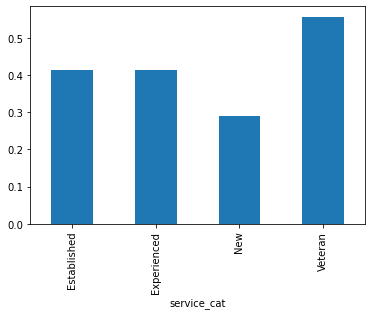

In [357]:
vis_data.plot.bar(legend=False)

# yahoo fiancil data links and python laibary